In [1]:
"""
https://cloud.google.com/bigquery/docs/reference/libraries#client-libraries-install-python

https://cloud.google.com/bigquery/docs/quickstarts/quickstart-client-libraries#bigquery_simple_app_query-python

BigQuery Query History: https://console.cloud.google.com/bigquery?project=manymoons-215635&page=queries

Remember to* pip install --upgrade google-cloud-bigquery

"""
# Imports the Google Cloud client library
from google.cloud import bigquery

# Instantiates a client
bigquery_client = bigquery.Client(project='manymoons-215635')

# Import pandas for output format as DataFrame
import pandas as pd
import json

/Users/jakeberliner/anaconda3/envs/mlenv/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/.
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


<div id="top"></div>
<a href="#parsing">Skip to Event Property Parsing</a>

### Function to grab table schema

In [2]:
def schema_row_to_dict(schema_row):
    return {
        'colname': schema_row.name,
        'type': schema_row.field_type,
        'mode': schema_row.mode,
        'description': schema_row.description,
        'fields': schema_row.fields
    }

In [3]:
def describe_table(table='bq_events_all', dataset='dataset_dev'):
    dataset_ref = bigquery_client.dataset(dataset)
    bq_events = dataset_ref.table(table)
    tab = bigquery_client.get_table(bq_events)
    return pd.DataFrame([schema_row_to_dict(row) for row in tab.schema])

### Main BQ Query Function

In [4]:
def query_BQ(query):
    """
    Main Query Function 
    
    Available datasets: 'dataset_dev'
    
    Available tables: 'bq_events_all'
    
    Example Query: "SELECT DISTINCT(event_type), COUNT(event_type) event_count FROM dataset_dev.bq_events_all GROUP BY event_type"
    """
    query_job = bigquery_client.query(query)
    results = query_job.result()
    return pd.DataFrame([dict(row) for row in results])

### Get Query-able Fields

In [ ]:
out_df = describe_table(table='bq_events_all', dataset='dataset_dev')

In [ ]:
out_df

### Query Events within a random session (with a non-anonymous user)

Added in list of possible event types that would have image URL sources

In [66]:
query = """
    SELECT client_event_time, session_id, event_type, event_properties, user_properties FROM `dataset_dev.bq_events_all`
    WHERE session_id = (SELECT session_id FROM dataset_dev.bq_events_all WHERE event_type IN ({}) ORDER BY RAND() LIMIT 1) 
    AND user_properties NOT LIKE '%anonymousId%' ORDER BY client_event_time;
""".format(', '.join(["'{}'".format(i) for i in imageURL_event_types]))
out_df = query_BQ(query)

In [67]:
out_df

,client_event_time,event_properties,event_type,session_id,user_properties
0,2018-05-12 16:27:06.852000,{},session_start,1526142426852,{}
1,2018-05-12 16:27:06.939000,{},sessionStarted,1526142426852,{}
2,2018-05-12 16:27:06.940000,{},sessionStarted,1526142426852,{}
3,2018-05-12 16:27:06.940000,"{'version': '4.0', 'build': '137'}",Application Installed,1526142426852,{}
4,2018-05-12 16:27:06.940000,"{'version': '4.0', 'from_background': False, '...",Application Opened,1526142426852,{}
5,2018-05-12 16:27:06.940000,{},Viewed screenshot.TutorialWelcomeSlide Screen,1526142426852,{}
6,2018-05-12 16:27:06.940000,{},Viewed screenshot.TutorialWelcomeSlide Screen,1526142426852,{}
7,2018-05-12 16:27:06.940000,{},Started Tutorial,1526142426852,{}
8,2018-05-12 16:27:06.940000,{},Started Tutorial,1526142426852,{}
9,2018-05-12 16:27:06.940000,{},APN Disabled,1526142426852,{}


#### Image Loading

In [68]:
img_url = 'https://image-cdn.craze-api.com/6qJ8Q4weAEehcHaq6h0Y2P1'

In [96]:
# https://stackoverflow.com/questions/15612373/convert-image-png-to-matrix-and-then-to-1d-array
from PIL import Image
import requests
import numpy as np

def image_url_to_vector(img_url):
    response = requests.get(img_url, stream=True)
    response.raw.decode_content = True
    original_image = Image.open(response.raw)
    rgba_image = original_image.convert('RGBA')
    arr = np.array(rgba_image)

    # record the original shape
    shape = arr.shape

    # make a 1-dimensional view of arr
    flat_arr = arr.ravel()

    # convert it to a matrix
    vector = np.matrix(flat_arr)

    # do something to the vector
    vector[:,::10] = 128

    # reform a numpy array of the original shape
    arr2 = np.asarray(vector).reshape(shape)

    # make a PIL image
    img2 = Image.fromarray(arr2, 'RGBA')
    return arr2

In [80]:
response = requests.get(img_url, stream=True)
response.raw.decode_content = True
image = Image.open(response.raw)

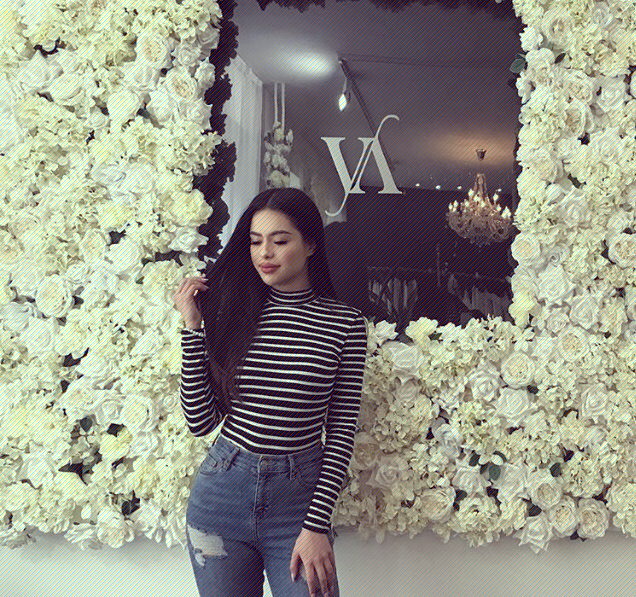

In [90]:
img = image.convert('RGBA')
arr = np.array(img)

# record the original shape
shape = arr.shape

# make a 1-dimensional view of arr
flat_arr = arr.ravel()

# convert it to a matrix
vector = np.matrix(flat_arr)

# do something to the vector
vector[:,::10] = 128

# reform a numpy array of the original shape
arr2 = np.asarray(vector).reshape(shape)

# make a PIL image
img2 = Image.fromarray(arr2, 'RGBA')
img2

In [94]:
# arr2

In [75]:
import urllib, io
io.StringIO(urllib.request.urlopen(img_url).read())
# file = cStringIO.StringIO(urllib.urlopen(URL).read())
# img = Image.open(file)

TypeError: initial_value must be str or None, not bytes

In [ ]:
urllib.request.

### Query All event types and # of occurrences

In [27]:
out_df = query_BQ("""
    SELECT DISTINCT(event_type), COUNT(event_type) event_count FROM dataset_dev.bq_events_all GROUP BY event_type
""")

In [28]:
len(out_df)

2905

In [38]:
sorted_df = out_df.sort_values('event_count', ascending=False).reset_index(drop=True)
# sorted_df

In [40]:
for e_type in sorted_df.event_type:
    print(e_type)

sent image to Clarifai
Loaded a Screen
Viewed MainTabBarController Screen
Received remote notification
session_start
session_end
Woke From Silent Push
Viewed screenshot.MainTabBarController Screen
pushNotification-received
received response from Clarifai
Application Opened
Application Started
Matchsticks Skip
received products from Syte
sent image to Syte
APN Enabled
Viewed screenshot.CampaignPromotion Screen
User Properties
Tapped on shoppable
sessionEnded
user imported screenshots
Viewed Add Photos Screen
Viewed screenshot.Tutorial Screen
Error
Tapped on screenshot
Opened with remote notification
sessionStarted
Viewed screenshot.Loading Screen
received response from Syte
err img hang
Opened Picker
Matchsticks Add
User Age
screenshot-created
Imported Photos
Tab Bar tapped
app sent local push notification
bypassed Clarifai on retry
Viewed EggRating.EggRating Screen
got results
Tapped on product
APN Disabled
user retried screenshots
Screenshot Added
Removed screenshot
Product for email


user email, hych.dee84@gmail.com
user email, royekayleigh23@gmail.com
Viewed https://www.forever21.com/us/shop/Catalog/Product/f21/shoes/2000242614 Screen
user email, Vdisalle@hotmail.com
user email, Cmdurham22@gmail.com
Viewed https://m.bloomingdales.com/shop/product/whistles-ash-printed-quilted-coat?ID=2622332 Screen
user email, maeganleslie19@yahoo.com
Viewed http://googleads.g.doubleclick.net/pcs/click?xai=AKAOjsuHtS0YxViovg9FcwBmacTQf8FE8JDtSC0b9wPeKTlwnmzPqZrf3LnR23CoTyxZ9XeyvHgDrrfiMWvOtGtpiMHkfi0Yi5W7MOw_gxJWXWp1tOEr_21VhhqkzBVujILiwyGxQM8AwTmtyAm5ybjtmxfxI-gnCtNFEr2yQixTsC49ti5fF1Hp247mj9KOw7ZTFMyh3PgbjGCE53zsdfUIzo6VWmWihiPoMRdWknat_R0TmOjT1rEVS9vsJR6T2PFix5vgMQ&sig=Cg0ArKJSzHXhmvDPKXjI&adurl=http://www.vogue.com/newsletter/subscribe%3FnewsletterId%3D248807%26sourceCode%3Dhouse-ad Screen
user email, kikihabana@gmail.com
Viewed http://www.boohoo.com/kayla-luxe-fur-coat/DZZ34378.html?color=157 Screen
user email, naomiakintola@hotmail.co.uk
user email, vanessacastellane@gmail.co

Viewed https://us.riverisland.com/p/black-wrap-popper-top-711290 Screen
Viewed https://www.houseoffraser.co.uk/women/jane-norman-black-sequin-maxi-dress/d866175.pd#281966087 Screen
Viewed https://www.officelondon.de/view/search?pageSize=30&search=sale+ca1&AUSWAHL+NACH=hers+sale&SCHUH-TYP=High+Heels Screen
Viewed https://www.freepeople.com/uk/new-clothes/ Screen
user email, Arycestari@hotmail.com
Viewed http://m.bloomingdales.com/shop/coupons-sales-promotions?cm_sp=HP_MBL2-_-VDAYEVENTOffer0209-_-xx Screen
user email, silvana.renxa@yahoo.com
user email, Lozzacazar@hotmail.com
Viewed http://www.selfridges.com/US/en/cat/nike-air-max-95-leather-and-mesh-trainers_726-10036-2026404056/?previewAttribute=Black+black+patent&previewSize=5&_$ja=tsid:32619%7Cprd:202819&cm_mmc=AFFIL-_-AWIN-_-202819-_-0RpXOIXA500&awc=3539_1510089155_b71cda74cb0d52f87666223583f1aacc&utm_source=Affiliates&utm_medium=202819&utm_term=na&utm_content=na&utm_campaign=na# Screen
Viewed https://www.mytheresa.com/en-gb/designe

In [6]:
# out_df = query_BQ("""
#     SELECT event_properties FROM dataset_dev.bq_events_all WHERE event_type = 'screenshot-created' ORDER BY insert_id DESC LIMIT 10
# """)

# Event Type Parsing Start Here
<div id="parsing"></div>
<a href="#top">Go to Top of Page</a>

### Get 10,000 Random Events and Properties

In [19]:
out_df = query_BQ("""
    SELECT event_properties, event_type FROM dataset_dev.bq_events_all ORDER BY RAND() LIMIT 100000
""")

### Function to generate map of keys in event_properties of each event_type (which can also vary for the same event_type)

In [20]:
def extract_event_types(out_df, verbose = False):
    event_type_map = {}
    failed_event_types = []
    for event_type in out_df.event_type.unique():
        event_type_df = out_df[out_df.event_type == event_type]
        if event_type not in event_type_map:
            event_type_map[event_type] = []
        for idx, row in event_type_df.iterrows():
            try:
                loaded = json.loads(row["event_properties"].replace("'",'"').replace('n"s',"n's").replace('False', '"False"').replace('True', '"True"'))
            except Exception as e:
                if verbose: 
                    print(e)
                    print(event_type, row['event_properties'], type(row["event_properties"]))
                failed_event_types.append(event_type)
                
            for key in loaded.keys():
                if key not in event_type_map[event_type]:
                    event_type_map[event_type].append(key)
                    
    unlanded_types = [e_type for e_type in failed_event_types if e_type not in event_type_map]
    
    return {
        'event_type_map': event_type_map,
        'failed_event_types': failed_event_types, # event types with at least 1 fail (could still be present in event_type_map)
        'unlanded_types': unlanded_types # event types that were in the out_df but failed on parsing the keys
    }

In [21]:
res = extract_event_types(out_df)

In [18]:
# Output keys
res.keys()

dict_keys(['event_type_map', 'failed_event_types', 'unlanded_types'])

In [25]:
imageURL_event_types = [e for e in res['event_type_map'] if 'screenshot-imageURL' in res['event_type_map'][e]]

In [40]:
', '.join(["'{}'".format(i) for i in imageURL_event_types])

"'Matchsticks Skip', 'Tapped on screenshot', 'Shoppable rating negative', 'shoppable-relatedLooks-loaded', 'Matchsticks Add', 'Tapped on shoppable', 'Tapped on product', 'screenshot-created', 'Removed screenshot', 'Product for email', 'Tapped on boohoo product', 'Product favorited', 'product-priceAlert-subscribed', 'product buy now', 'Screenshot Opened Without Shoppables', 'product-burrow', 'feature-recovery-appeared', 'Shared screenshot', 'Sale recovery prompt dismissed', 'feature-screenshotPreview-peek', 'Share incomplete', 'adding to discover', 'Product unfavorited', 'product-priceAlert-unsubscribed', 'Sale recovery prompt - did not appear', 'Sale recovery prompt displayed', 'Shoppable rating positive', 'Product variant changed', 'Shoppable Feedback Negative'"

In [42]:
query = """
    SELECT event_properties, event_type FROM dataset_dev.bq_events_all WHERE event_type IN ({}) ORDER BY RAND() LIMIT 10000
""".format(', '.join(["'{}'".format(i) for i in imageURL_event_types]))

out_df = query_BQ(query)
# query

In [44]:
for i in out_df.event_properties:
    print(i)

{'user-age': 3, 'user-sessionCount': 2, 'screenshot-imageURL': 'https://s3-us-west-2.amazonaws.com/syte-image-uploads-west/z0KpCSrFjPbyD3SntmVeB_6677', 'by': 'tap', 'screenshot-id': '42G6zpQCSne88GXnfiJKOZ1'}
{}
{'screenshot-source': 'gallery', 'shoppable-category': 'Hats', 'screenshot-imageURL': 'https://s3-us-west-2.amazonaws.com/syte-image-uploads-west/qqU5e795GfVmtALlaGf5N_6677', 'shoppable-offerURL': 'https://d1wt9iscpot47x.cloudfront.net/offers?image_url=aHR0cHM6Ly9zMy11cy13ZXN0LTIuYW1hem9uYXdzLmNvbS9zeXRlLWltYWdlLXVwbG9hZHMtd2VzdC9xcVU1ZTc5NUdmVm10QUxsYUdmNU5fNjY3Nw%3D%3D&crop=eyJ5MiI6MC4zNjA0NzQ0NjcyNzc1MjY4NiwieSI6MC4xODk0NzczMjQ0ODU3Nzg4LCJ4MiI6MC42MjI3MzM1MzMzODI0MTU4LCJ4IjowLjM1ODA2NzU3MjExNjg1MTh9&cats=WyJIYXRzIl0%3D&prob=0.5215&catalog=fashion&gender=female&feed=shoppable_production&country=US&account_id=6677&sig=GglIWwyIdqi5tBOhAmQMA6gEJVpCPEbgf73OCXYbzCU%3D'}
{'source': 'list', 'screenshot-source': 'gallery', 'user-sessionCount': 0, 'user-age': 0, 'usc-experience': 'non

{'url': 'https://s3.amazonaws.com/s3-file-store/generated/kuQ04njVwQbsuampff7Av', 'by': 'swipe'}
{'url': 'https://s3.amazonaws.com/s3-file-store/generated/24tLhTXGIQjgAcPET1BZc', 'by': 'swipe'}
{'url': 'https://s3.amazonaws.com/s3-file-store/generated/rfopZybpQQ-DtTgsca3Y4', 'by': 'tap'}
{'by': 'tap'}
{'url': 'https://s3.amazonaws.com/s3-file-store/generated/aPiYeY85s4ZtMCM9I6a3Y', 'by': 'swipe'}
{'user-age': 0, 'user-sessionCount': 0, 'screenshot-imageURL': 'https://s3.amazonaws.com/screenshop-ordered-matchsticks/byUUID/2PM2Xr71Ueq5WwDExTd8wA1.jpg', 'by': 'swipe', 'screenshot-id': '29207'}
{'screenshot-imageURL': 'https://image-cdn.craze-api.com/2Thsl7ZcvYnwdjD7I7I8fb1', 'by': 'swipe'}
{'screenshot': 'https://s3-us-west-2.amazonaws.com/syte-image-uploads-west/SwvMMJjyfVOQFrMt1mXme_6677'}
{}
{'url': 'https://s3.amazonaws.com/s3-file-store/generated/jS62fh2GLvesYWQsWp-Jz', 'by': 'tap'}
{'by': 'swipe', 'url': 'https://s3.amazonaws.com/s3-file-store/generated/q9xd0DtUjhWnEFrUREMp_'}
{'url

{'user-age': 1, 'shoppable-isBurrow': False, 'shoppable-offerURL': 'https://d1wt9iscpot47x.cloudfront.net/offers?image_url=aHR0cHM6Ly9pbWFnZS1jZG4uY3JhemUtYXBpLmNvbS8yM2FnWkJzUExHUmo2b3dvcDVqdTR3MQ%3D%3D&crop=eyJ5MiI6MC43NjU4MTgxMTkwNDkwNzIzLCJ5IjowLjUzNDI5MTE0ODE4NTczLCJ4MiI6MC4xNjc5OTI2MzY1NjEzOTM3NCwieCI6MC4wfQ%3D%3D&cats=WyJIYW5kYmFncyJd&prob=0.6843&catalog=fashion&gender=female&country=ZA&account_id=6677&sig=GglIWwyIdqi5tBOhAmQMA6gEJVpCPEbgf73OCXYbzCU%3D', 'usc-experience': 'non-usc', 'screenshot-imageURL': 'https://image-cdn.craze-api.com/23agZBsPLGRj6owop5ju4w1', 'screenshot-source': 'discover', 'user-sessionCount': 0, 'shoppable-burrowsCount': 0, 'shoppable-category': 'Bags'}
{'source': 'list', 'screenshot-source': 'gallery'}
{'screenshot-source': 'discover', 'user-sessionCount': 0, 'screenshot-imageURL': 'https://image-cdn.craze-api.com/1TffxTjyQKba4n0XrX1ZkY1', 'usc-experience': 'non-usc', 'user-age': 0}
{'url': 'https://s3.amazonaws.com/s3-file-store/generated/zekDW9_7ibWRO_

{}
{}
{'screenshot-source': 'screenshot', 'user-sessionCount': 1, 'screenshot-imageURL': 'https://firebasestorage.googleapis.com/v0/b/screenshop-73386.appspot.com/o/user%2FLziAgw8B7xXUPWs6EFjEVCZJovc2%2Fimages%2F88B2118E-D0D0-4234-97AB-38D486786631.jpg?alt=media&token=e0fe7fbd-cc19-42b7-bcf7-5eb264d3c59f', 'user-age': 4}
{'screenshot-source': 'discover', 'user-sessionCount': 9, 'screenshot-imageURL': 'https://s3.amazonaws.com/screenshop-ordered-matchsticks/byUUID/2OJi49MvYJEUIot9g4Ghms1.jpg', 'user-age': 169}
{'screenshot-source': 'screenshot', 'user-sessionCount': 1, 'screenshot-imageURL': 'https://syte-image-uploads-west.s3-accelerate.amazonaws.com/RrX9JX_jMVoER9r7ID7OK_6677', 'user-age': 164}
{'screenshot-source': 'screenshot', 'user-sessionCount': 0, 'screenshot-imageURL': 'https://syte-image-uploads-west.s3-accelerate.amazonaws.com/gDJM9L9yVTOwz1k7oV8tB_6677', 'user-age': 0}
{'screenshot-imageURL': 'https://image-cdn.craze-api.com/6lWVE8X7LXIHlWWU4mdnLb1', 'by': 'swipe'}
{}
{'user

{}
{}
{'url': 'https://s3-us-west-2.amazonaws.com/syte-image-uploads-west/yfWt15wpghyV5oYpER2aG_6677', 'by': 'swipe'}
{'screenshot-id': '27736', 'user-age': 0, 'by': 'tap', 'user-sessionCount': 0, 'screenshot-imageURL': 'https://s3.amazonaws.com/screenshop-ordered-matchsticks/byUUID/2k8Bkns8oUD7oQXRpMrxdn1.jpg', 'url': 'https://s3.amazonaws.com/screenshop-ordered-matchsticks/byUUID/2k8Bkns8oUD7oQXRpMrxdn1.jpg'}
{'url': 'https://s3.amazonaws.com/s3-file-store/generated/16KjEsziY7YTJsPPoIjoL', 'by': 'swipe'}
{'url': 'https://s3-us-west-2.amazonaws.com/syte-image-uploads-west/GIbLTHOj7OZDzYKaNj22R', 'by': 'swipe'}
{'product-isSale': False, 'page': 'Products', 'displayAs': 'safari', 'product-filter-gender': 'auto', 'product-price-display': 'ufdfc131.32', 'product-brand': 'FOREVER21', 'product-filter-size': 'adult', 'product-brandOrMerchant': 'FOREVER21', 'product-isFavorite': False, 'screenshot-source': 'gallery', 'product-filter-category': 'auto', 'product-imageURL': 'http://www.forever21

{'url': 'https://s3.amazonaws.com/s3-file-store/generated/hz0p4Lt0Q2PZ4scvHVoyI', 'by': 'tap'}
{'screenshot': 'https://s3.amazonaws.com/s3-file-store/generated/OnxGoDMTkzVML6D8MEuTO'}
{'source': 'discover', 'screenshot': 'https://image-cdn.craze-api.com/7FXsNfh9TvdtlKj6p7ar6W1', 'screenshot-source': 'discover', 'screenshot-imageURL': 'https://image-cdn.craze-api.com/7FXsNfh9TvdtlKj6p7ar6W1'}
{'user-age': 28, 'user-sessionCount': 0, 'screenshot-imageURL': 'https://s3.amazonaws.com/screenshop-ordered-matchsticks/4985.jpg', 'by': 'swipe', 'screenshot-id': '4985'}
{}
{'category': 'Boots', 'screenshot': 'https://s3-us-west-2.amazonaws.com/syte-image-uploads-west/qSDLD-JIr4Gibf4iiL35d_6677', 'rating': 5, 'augmented_offers_url': 'https:https://d1wt9iscpot47x.cloudfront.net/offers?image_url=aHR0cHM6Ly9zMy11cy13ZXN0LTIuYW1hem9uYXdzLmNvbS9zeXRlLWltYWdlLXVwbG9hZHMtd2VzdC9xU0RMRC1KSXI0R2liZjRpaUwzNWRfNjY3Nw%3D%3D&crop=eyJ5MiI6MC43Mzg0ODA5MjU1NTk5OTc2LCJ5IjowLjMxMjEyODY2MzA2MzA0OTMsIngyIjowLjUwOTg5

{'url': 'https://s3-us-west-2.amazonaws.com/syte-image-uploads-west/ufZuVbmPLD5xrG1RX3etj_6677', 'by': 'swipe'}
{'user-age': 0, 'user-sessionCount': 0, 'screenshot-imageURL': 'https://s3.amazonaws.com/screenshop-ordered-matchsticks/byUUID/2RR96YVt6xc9aXz8ZTehfV1.jpg', 'by': 'swipe', 'screenshot-id': '29032'}
{'url': 'https://s3.amazonaws.com/s3-file-store/generated/_eUw4hIY1FTeOgg0d4DTf', 'by': 'swipe'}
{'shoppable-isBurrow': False, 'shoppable-offerURL': 'https://d1wt9iscpot47x.cloudfront.net/offers?image_url=aHR0cHM6Ly9zeXRlLWltYWdlLXVwbG9hZHMtd2VzdC5zMy1hY2NlbGVyYXRlLmFtYXpvbmF3cy5jb20vQkJRUXgtV2hOU0JiVnh4Y2VaR0VtXzY2Nzc%3D&crop=eyJ5MiI6MC40OTQwMTExMDQxMDY5MDMxLCJ5IjowLjQwMzQ5NDc3NTI5NTI1NzU3LCJ4MiI6MC40OTQ3MDg5MjU0ODU2MTA5NiwieCI6MC4zOTQ2NjgzNzA0ODUzMDU4fQ%3D%3D&cats=WyJXYXRjaGVzIl0%3D&prob=0.5061&catalog=fashion&gender=male&country=US&account_id=6677&sig=GglIWwyIdqi5tBOhAmQMA6gEJVpCPEbgf73OCXYbzCU%3D', 'usc-experience': 'non-usc', 'screenshot-imageURL': 'https://syte-image-uploads-

{'merchant': 'boohoo', 'name': 'Camilla Grøngård', 'screenshot': 'https://s3.amazonaws.com/s3-file-store/generated/XHoqY6bkQ2sWiAiz9olRp', 'title': 'boohoo', 'url': 'https://syteapi.com/product?url=aHR0cHM6Ly9hcGkuc2hvcHN0eWxlLmNvbS9hY3Rpb24vYXBpVmlzaXRSZXRhaWxlcj9pZD02NDU5MjM4NzImcGlkPXVpZDU2MjUtNDAwMTE1MjUtMzYmc2l0ZT13d3cuc2hvcHN0eWxlLmNvLnVrJnVpX2NvbGxlY3RpdmVjbGlja291dD10cnVl&image_url=aHR0cHM6Ly9zMy5hbWF6b25hd3MuY29tL3MzLWZpbGUtc3RvcmUvZ2VuZXJhdGVkL1hIb3FZNmJrUTJzV2lBaXo5b2xScA==&coords=eyJ5MSI6MC42NDQ4OTgxMTY1ODg1OTI1LCJ5MCI6MC40MDc3Mzk2OTg4ODY4NzEzNCwieDEiOjAuNTY5NDgxMTM0NDE0NjcyOSwieDAiOjAuMjcwMjA4NTM3NTc4NTgyNzZ9&account_id=6677&sig=ifgiD0/6OizGv1cuMz+3GhQGBFEKotD4v45AznTD+kg=', 'imageUrl': 'https://img.shopstyle-cdn.com/mim/46/c7/46c71706421c507c2428102dc2380b4d.jpg', 'email': 'camillagrongaard@gmail.com', 'price': 'kr50.14', 'brand': 'boohoo'}
{'screenshot-imageURL': 'https://s3-us-west-2.amazonaws.com/syte-image-uploads-west/BlJPpqgqonYAC-AppUFYo_6677', 'by': 'swipe'}
{'by'

{'user-age': 111, 'shoppable-isBurrow': False, 'shoppable-offerURL': 'https://d1wt9iscpot47x.cloudfront.net/offers?image_url=aHR0cHM6Ly9maXJlYmFzZXN0b3JhZ2UuZ29vZ2xlYXBpcy5jb20vdjAvYi9zY3JlZW5zaG9wLTczMzg2LmFwcHNwb3QuY29tL28vdXNlciUyRlJpUE43bW0wSlJSV3E2YnlIMXBqa2Yza1pmRjMlMkZpbWFnZXMlMkZFNEFFQUFEMy0xOUI0LTQ3MUEtOEI1Ni1BOEVBNjY3RkU0QzUuanBnP2FsdD1tZWRpYSZ0b2tlbj01NzRmMDZlOS1jYTMxLTQ5MzUtYmNkNy1iYmFhMGRjMzQ2YTk%3D&crop=eyJ5MiI6MC40MjM5ODMyMTYyODU3MDU1NywieSI6MC4zMjExNjU3NDA0ODk5NTk3LCJ4MiI6MC42MTA1NzIyMTg4OTQ5NTg1LCJ4IjowLjM5MTY5NDE4ODExNzk4MDk2fQ%3D%3D&cats=WyJOZWNsZXNzZXMiXQ%3D%3D&prob=0.5401&catalog=fashion&gender=female&country=US&account_id=6677&sig=GglIWwyIdqi5tBOhAmQMA6gEJVpCPEbgf73OCXYbzCU%3D', 'screenshot-source': 'gallery', 'shoppable-category': 'Necklaces', 'user-sessionCount': 0, 'screenshot-imageURL': 'https://firebasestorage.googleapis.com/v0/b/screenshop-73386.appspot.com/o/user%2FRiPN7mm0JRRWq6byH1pjkf3kZfF3%2Fimages%2FE4AEAAD3-19B4-471A-8B56-A8EA667FE4C5.jpg?alt=media&to

In [36]:
query = """
    SELECT event_properties, event_type FROM dataset_dev.bq_events_all WHERE event_type IN ('Matchsticks Skip') ORDER BY RAND() LIMIT 10000
"""
out_df = query_BQ(query)